# Filtragem espacial

Adaptado dos exemplos de Moacir A. Ponti, ICMC/USP, 2021)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

A filtragem espacial de imagens utiliza um elemento (filtro) para realizar operações que considerem não apenas o pixel atual, mas também outros pixels da imagem, comumente de acordo com uma vizinhança local (ou seja, pixels com coordenadas similares à do pixel sendo processado).
A operação matemática que define a filtragem espacial local é conhecida por convolução, dada pelo operador asterisco ou estrela * (é importante diferenciar esse de um simples produto, que em notação matemática não é dado por esse mesmo símbolo):
$$ g = w * f$$
A equação acima significa que uma nova imagem g é obtida pela convolução do filtro w com a imagem de entrada f
Para filtrar um pixel na imagem f centrado na coordenada (x,y), produzindo um novo pixel g(x,y), temos:
$$ g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) \cdot f(x-s, y-t)$$
A idéia dessa equação é que o filtro w tenha dimensões diferentes de f. Vamos dizer que w tem tamanho m x n e que f tenha tamanho M x N.
Outra questão importante é que a equação assume que o filtro w é centrado na posição (0,0). Isso complica um pouco a equação, mas na prática a operação é bem simples.
Para que a equação anterior funcione é preciso que m = 2a+1 e n = 2b+1


In [ ]:
# vamos implementar uma funcao que executa convolucao para todos os pixels (x,y) da imagem
def image_convolution(f, w, debug=False):
    N,M = f.shape
    n,m = w.shape
    
    a = int((n-1)/2)
    b = int((m-1)/2)

    # obtem filtro invertido
    w_flip = np.flip( np.flip(w, 0) , 1)

    g = np.zeros(f.shape, dtype=np.uint8)

    # para cada pixel:
    for x in range(a,N-a):
        for y in range(b,M-b):
            # obtem submatriz a ser usada na convolucao
            sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]
            if (debug==True):
                print(str(x)+","+str(y)+" - subimage:\n"+str(sub_f))
            # calcula g em x,y
            g[x,y] = np.sum( np.multiply(sub_f, w_flip)).astype(np.uint8)

    return g

: 

### Filtragem de imagens

Os filtros podem ser projetados com finalidades diferentes.
Os filtros mais comuns usados são: filtros **smoothing**, que produzem imagens com menor variação local, reduzindo o ruído, mas também suprimindo pequenos detalhes e texturas; e filtros **diferenciais**, que funcionam como operador derivado, que podem ser usados para detectar transições locais, realçar a variação local, aumentando detalhes e ruídos se presentes na imagem.

Vamos mostrar alguns exemplos

In [16]:
img1 = cv2.imread("pattern.png")
img2 = cv2.imread("gradient_noise.png")
img3 = cv2.imread("board.jpg")

#Convertendo BGR para RGB
img1_pb = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
img2_pb = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
img3_pb = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)



In [17]:
# filtro de média 3x3 (simétrico) que considera a 4-vizinhança
w_med = np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0
print(w_med)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


(-0.5, 319.5, 319.5, -0.5)

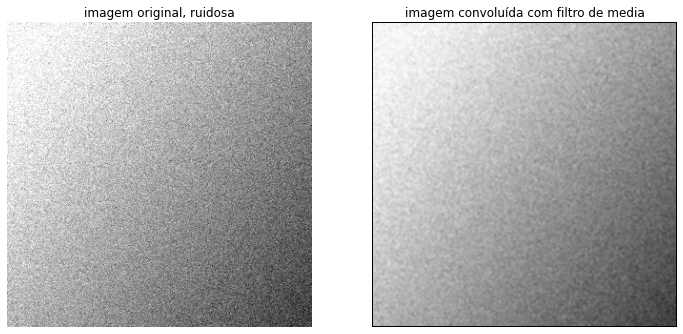

In [18]:
img2_media = image_convolution(img2_pb, w_med)

# exibindo imagem original e filtrada por w_med
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img2_pb, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem original, ruidosa")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_media, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("imagem convoluída com filtro de media")
plt.axis('off')

Note que a imagem da direita tem uma borda com pixels pretos (valor 0) - isso ocorre porque não processamos os a pixels da borda, dado por: $a = (m-1)/2$, onde m é o tamanho do filtro. Nesse caso a = 1 e portanto a borda com valores 0 tem 1 pixel.
Por exemplo, se aplicarmos um filtro maior, de tamanho 7, então teremos 3 pixels de borda.
A seguir daremos outros exemplos de filtro, incluindo filtros diferenciais e também um exemplo de filtro aleatório.

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


(-0.5, 255.5, 255.5, -0.5)

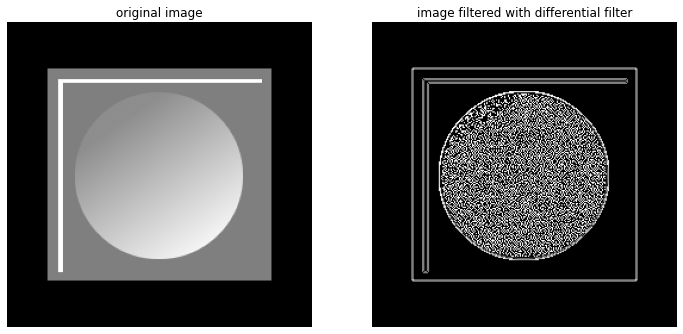

In [19]:
w_diff = np.matrix([[ 0, -1,  0], 
                    [-1,  4, -1], 
                    [ 0, -1,  0]])
print(w_diff)

img1_diff = image_convolution(img1_pb, w_diff)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1_pb, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("original image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img1_diff, cv2.COLOR_BGR2RGB), cmap="gray", vmin=0, vmax=255)
plt.title("image filtered with differential filter")
plt.axis('off')

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


(-0.5, 255.5, 255.5, -0.5)

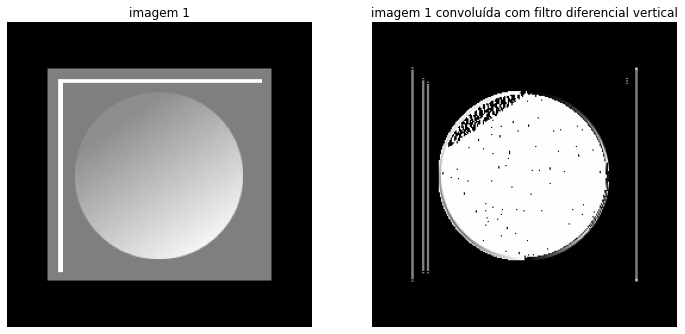

In [20]:
w_vert = np.matrix([[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])
print(w_vert)

img1_vert = image_convolution(img1_pb, w_vert)

# exibindo imagem 1 e filtrada por w_diff
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img1_pb, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_vert, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1 convoluída com filtro diferencial vertical")
plt.axis('off')

Se você inspecionar os filtros acima, todos eles são projetados para produzir algum tipo de efeito em termos de difusão dos valores de pixel (suavização, por exemplo, filtro médio) ou detecção de transições (filtros diferenciais, por exemplo, bordas verticais).

Mas e se tivermos um * filtro aleatório *?

[[0.81826598 0.02128132 0.35281199 0.48212408 0.87481589 0.05381078
  0.26722714]
 [0.29214247 0.67652011 0.30061802 0.1827028  0.4402284  0.53098972
  0.94520391]
 [0.51362777 0.67357127 0.1217076  0.33263827 0.27445472 0.57034489
  0.66012071]
 [0.28208075 0.14658688 0.11381033 0.66528158 0.06375494 0.47927783
  0.64877066]
 [0.1380118  0.6869405  0.03293906 0.90560652 0.22641078 0.5699356
  0.26125693]
 [0.18081221 0.37420701 0.4747139  0.25048179 0.8431916  0.84570458
  0.72266772]
 [0.44202255 0.54848711 0.62663288 0.49973586 0.73760253 0.45665312
  0.61675677]]


(-0.5, 499.5, 464.5, -0.5)

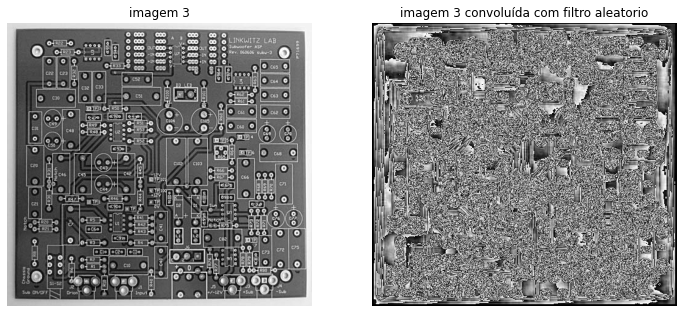

In [21]:
# filtro de valores aleatorios 7x7
w_rand = np.random.random([7,7])
print(w_rand)
img3_wrand = image_convolution(img3_pb, w_rand)

# exibindo imagem 3 e filtrada por w_2 aleatorio
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img3_pb, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 3")
plt.axis('off')
plt.subplot(122)
plt.imshow(img3_wrand, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 3 convoluída com filtro aleatorio")
plt.axis('off')

Isso é um efeito do filtro aleatório ou há alguma coisa errada?

Nosso filtro tem valores positivos que somam muito mais que 1, a energia das regiões locais vai aumentar. Isso, a princípio, aumentaria apenas o brilho da imagem. Mas, na verdade, porque estamos operando em 8 bits, o efeito de tais convoluções sucessivas é * estouro *


In [22]:
np.sum(w_rand)

22.22554165557217

Podemos normalizar o filtro pra somar 1

[[0.02683066 0.01775639 0.00054065 0.00104512 0.01093611 0.03158674
  0.03801906]
 [0.00472854 0.03007144 0.03945835 0.0301147  0.01998581 0.00473937
  0.03156298]
 [0.00131333 0.00430783 0.00961446 0.01292049 0.03749887 0.0190044
  0.0188781 ]
 [0.03285423 0.00974342 0.02519625 0.02128075 0.02436496 0.01070029
  0.01744107]
 [0.02044671 0.01610552 0.01159377 0.03715535 0.01660919 0.00847615
  0.03731935]
 [0.01681811 0.00563444 0.00402197 0.03709025 0.01201121 0.03831699
  0.01360559]
 [0.01557901 0.03677631 0.02734154 0.03135909 0.0280402  0.03763125
  0.01557365]]


(-0.5, 499.5, 464.5, -0.5)

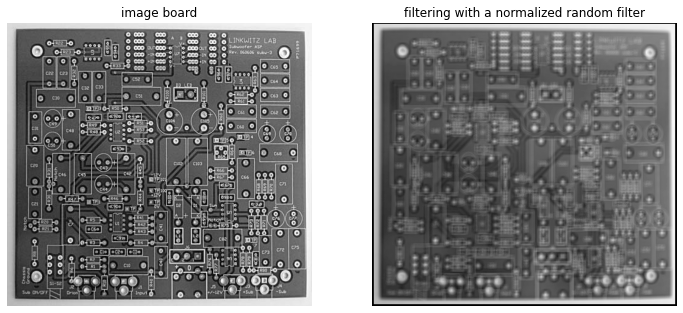

In [23]:
w_rand = np.random.random([7,7])
w_rand = w_rand/np.sum(w_rand)
print(w_rand)
img3_wrand = image_convolution(img3_pb, w_rand)

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.title("image board")
plt.axis('off')
plt.subplot(122)
plt.imshow(img3_wrand, cmap="gray", vmin=0, vmax=255)
plt.title("filtering with a normalized random filter")
plt.axis('off')

(-0.5, 224.5, 224.5, -0.5)

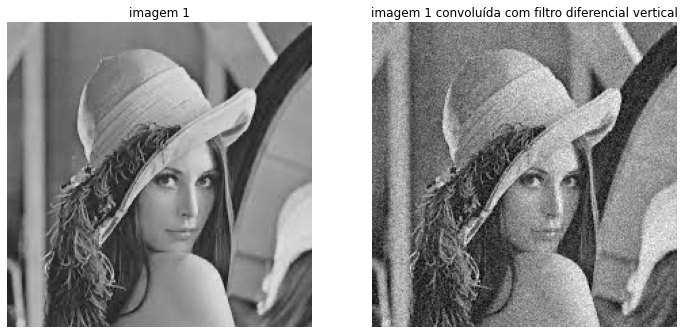

In [24]:
#Criando ruidos na imagem para poder testar os filtros
img4 = cv2.imread("lena.png")
img4_pb = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY) 
#0 a 15 os valores criados para ruido. Experimente adicionar mais valores.
noise = np.random.normal(0, 15, img4_pb.shape)
noisy = img4_pb + noise
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(noisy, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1 convoluída com filtro diferencial vertical")
plt.axis('off')

[[1 1 1]
 [1 1 1]
 [1 1 1]]


(-0.5, 224.5, 224.5, -0.5)

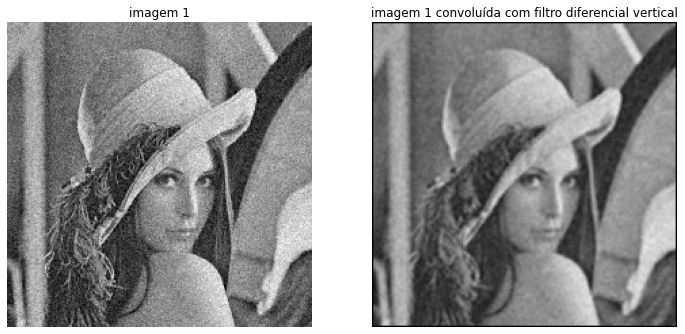

In [46]:
#filtro passa baixa - 1/9
w_passaBaixa = np.matrix([[1,1,1],
                    [1,1,1],
                    [1,1,1]
                 ])
print(w_passaBaixa)
#aqui novamente houve um estouro da imagem, portanto, normalizamos.
w_passaBaixa = w_passaBaixa/np.sum(w_passaBaixa)
img4_passaBaixa = image_convolution(noisy, w_passaBaixa)


# exibindo imagem 1 e filtrada por w_diff
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(noisy, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(img4_passaBaixa, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1 convoluída com filtro passa baixa")
plt.axis('off')

## Filtro passa alta

(-0.5, 183.5, 162.5, -0.5)

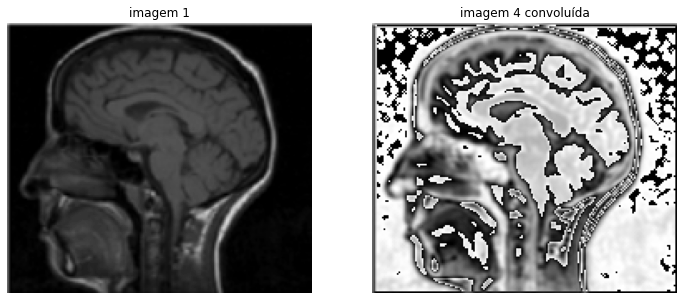

In [47]:
#filtro passa alta utilizando passa baixa
img5 = cv2.imread("img5.png")
img5_pb = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY) 

#filtro passa baixa - 1/5
w_passaBaixa = np.matrix([[0, 1, 0],
                    [1,1,1],
                    [0,1,0]
                 ])
img5_alta = image_convolution(img5_pb, w_passaBaixa)

#filtro passa alta = img(x,y) - filtroPassaBaixa(x,y)
img_alta = img5_pb - img5_alta

# exibindo imagem 1 e filtrada por w_diff
plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img5_pb, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(img_alta, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 5 convoluída")
plt.axis('off')

(-0.5, 183.5, 162.5, -0.5)

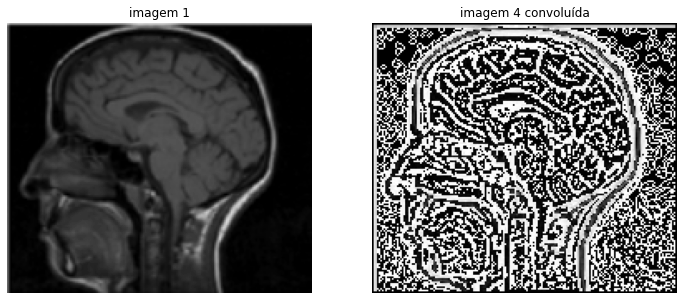

In [48]:
#filtro passa alta com filtro próprio
img5 = cv2.imread("img5.png")
img5_pb = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY) 

#filtro passa alta - laplace
w_passaAlta = np.matrix([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]
                 ])
img5_alta = image_convolution(img5_pb, w_passaAlta)


plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img5_pb, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 1")
plt.axis('off')
plt.subplot(122)
plt.imshow(img5_alta, cmap="gray", vmin=0, vmax=255)
plt.title("imagem 4 convoluída")
plt.axis('off')

O problema deste tipo de filtro é que ele geralmente realça também ruídos do processo de obtenção da imagem

## Blur e Laplace

(-0.5, 183.5, 162.5, -0.5)

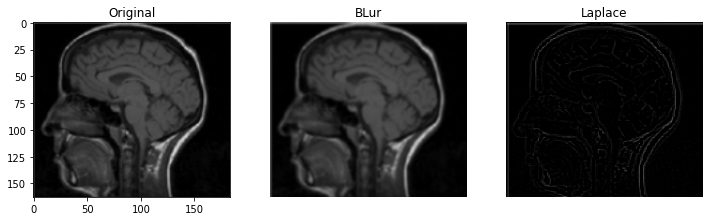

In [50]:
#CV_64F significa que é uma imagem de 1 canal. Se for CV_64FC3 é 3 canais. 


#borrando a imagem: Blur
blur = cv2.GaussianBlur(img5_pb,(3,3),0)

#Filtro passa alta de Laplace.
laplacian = cv2.Laplacian(img5_pb,cv2.CV_64F)

plt.figure(figsize=(12,12)) 
plt.subplot(131)
plt.imshow(img5_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.subplot(132)
plt.imshow(blur, cmap="gray", vmin=0, vmax=255)
plt.title("BLur")
plt.axis('off')
plt.subplot(133)
plt.imshow(laplacian, cmap="gray", vmin=0, vmax=255)
plt.title("Laplace")
plt.axis('off')


## Sobel

Text(0.5, 1.0, 'Original')

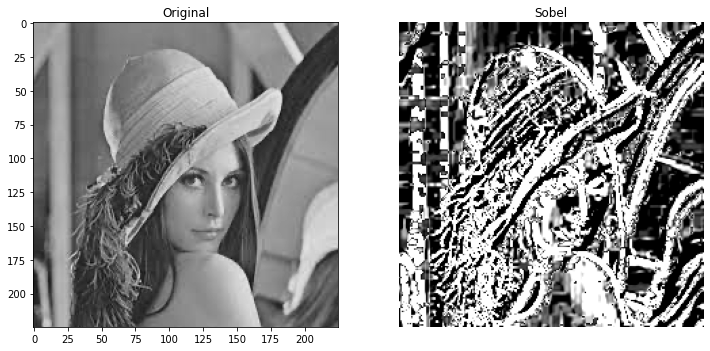

In [ ]:
#ksize = janela 5x5


img_sobelx = cv2.Sobel(img4_pb,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img4_pb,cv2.CV_8U,0,1,ksize=5)
sobel = img_sobelx + img_sobely

plt.figure(figsize=(12,12)) 
plt.subplot(122)
plt.imshow(sobel, cmap="gray", vmin=0, vmax=255)
plt.title("Sobel")
plt.axis('off')

plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")

## Prewitt

Text(0.5, 1.0, 'Prewitt')

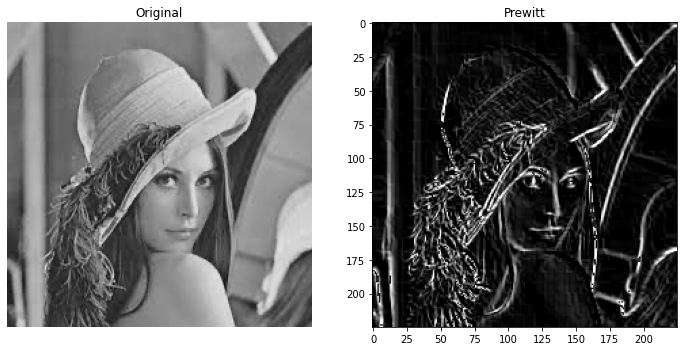

In [56]:
#FIltro de Prewitt nao tem no opencv, mas é so definir o valor do filtro x e y e somar os dois. 
import math

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
#ao inves de usar a funcao convolucional dos exemplos acima, vc define o valor do filtro e usa no filter2D
img_prewittx = cv2.filter2D(img4_pb, -1, kernelx)
img_prewitty = cv2.filter2D(img4_pb, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

plt.figure(figsize=(12,12)) 
plt.subplot(121)
plt.imshow(img4_pb, cmap="gray", vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')
plt.subplot(122)
plt.imshow(img_prewitt, cmap="gray", vmin=0, vmax=255)
plt.title("Prewitt")


## Canny 

Como já foi detalhado acima, costumamos usar o operador de sobel e prewitt para calcular o gradiente.
Como forma de simplificar o resultado final costumamos reduzir a borda pra minima possivel. 
Como exatamente o algoritmo sabe se uma borda fraca está conectada a uma borda forte? O algoritmo de borda Canny determina isso considerando cada pixel de borda fraco e seus 8 pixels vizinhos. Se qualquer um de seus pixels adjacentes fizer parte de uma borda forte, considera-se que ele está conectado a uma borda forte. Assim, este pixel é preservado em nosso resultado final. Em contraste, se nenhum dos pixels vizinhos for forte, presume-se que não faz parte de uma aresta forte e, portanto, é suprimido.
Decidir o que é realmente borda e o que é ruído. 
Uma primeira abordagem é definir um limite, acima dele tudo é
uma borda verdadeira e abaixo dele apagamos tudo

Após alguma experimentação, escolho 100 e 200 para nossos valores de limite baixo e alto, respectivamente. Na minha opinião, esses valores produzem o melhor resultado. No entanto, eles são um tanto subjetivos, então eu o encorajo a experimentar outros. Você pode encontrar outros valores de limite que produzem resultados melhores!


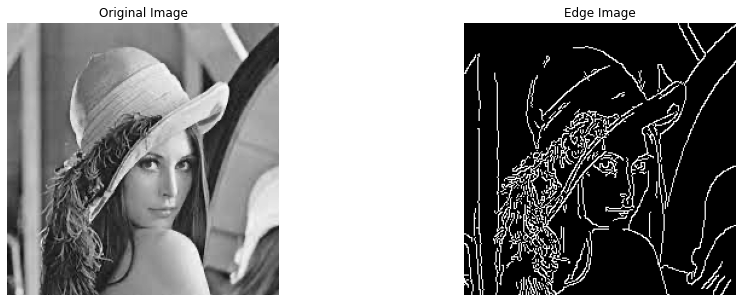

In [57]:
edges = cv2.Canny(img4_pb,100,200)

fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].imshow(img4_pb,cmap = 'gray')
ax[0].set_title('Original Image') 
ax[0].axis('off')
ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].axis('off')
plt.show()